# Write a python code to accomplish the following tasks: 
### Obtain the images “a.png” and “b.png” from the assignment folder. Each image has 512× 512pixels.
#### A. Read and display the images.


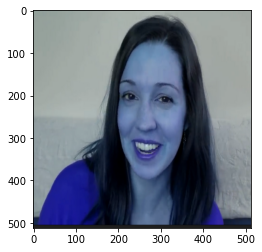

In [5]:
import cv2
import matplotlib.pyplot as plt
img1=cv2.imread('Assingment/a.png')
img2=cv2.imread('Assingment/b.png')
img1_resize=cv2.resize(img1,(512,512))
img2_resize=cv2.resize(img2,(512,512))
plt.imshow(img1_resize)
plt.show()

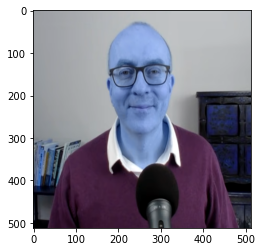

In [5]:
plt.imshow(img2_resize)

In [6]:
print(img1_resize.shape,'image 1 shape')
print(img2_resize.shape,'image 2 shape')

(512, 512, 3) image 1 shape
(512, 512, 3) image 2 shape


## B. Define a new 512× 512 image J as follows: 
#### the left half of J, i.e., the first 256 columns,should be equal to the left half of the a.png image. The right half of J, i.e., the 257th column through the 512 th column, should be equal to the right half of the b.png image.


In [7]:
import numpy as np
New_img=np.zeros((img2_resize.shape[0],img2_resize.shape[1],img2_resize.shape[2]),img2_resize.dtype)
New_img.shape

(512, 512, 3)

In [8]:
image_crop_a=img1_resize[0:512,0:256]
image_crop_b=img2_resize[0:512,256:512]
# New_img=New_img[image_crop_a,image_crop_b]
print(image_crop_a.shape,'image 1 shape')
print(image_crop_b.shape,'image 2 shape')
print(New_img.shape,'image 2 shape')
# for x in range(image_crop_a.shape[0]):
#     for y in range(image_crop_a.shape[1]):
#         New_img[x,y]=image_crop_a[x,y]


New_img[0:512,0:256]=image_crop_a
New_img[0:512,256:512]=image_crop_b
            

(512, 256, 3) image 1 shape
(512, 256, 3) image 2 shape
(512, 512, 3) image 2 shape


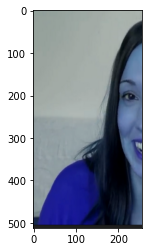

In [9]:
plt.imshow(image_crop_a)

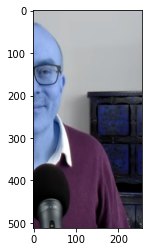

In [10]:
plt.imshow(image_crop_b)

(512, 512, 3) image 2 shape


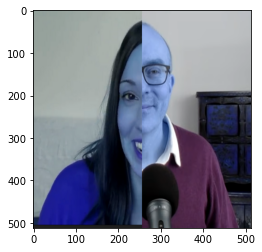

In [11]:
plt.imshow(New_img)
print(New_img.shape,'image 2 shape')

 ## C. Define a new 512× 512 image K by swapping the left and right halves of J.


In [12]:
k=np.zeros((img2_resize.shape[0],img2_resize.shape[1],img2_resize.shape[2]),img2_resize.dtype)

In [13]:
k[0:512,0:256]=image_crop_b 
k[0:512,256:512]=image_crop_a

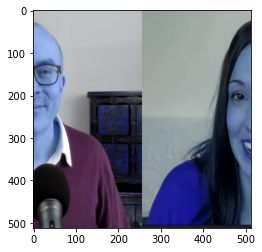

In [14]:
plt.imshow(k)

## D. Segment b.png.




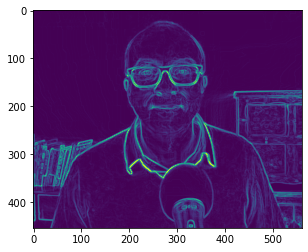

In [15]:
ddept=cv2.CV_16S
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
x = cv2.Sobel(gray, ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(gray, ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
grad = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
plt.imshow(grad)
imgcanny=cv2.Canny(gray,50,50)
plt.imshow(imgcanny

## E. Convert the image to a grayscale image

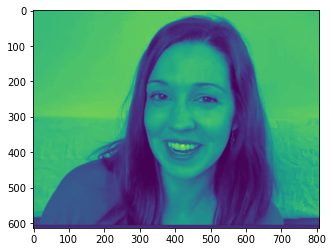

In [6]:
import cv2
img1=cv2.imread('Assingment/a.png')
img2=cv2.imread('Assingment/b.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1)

## F. apply color inversion

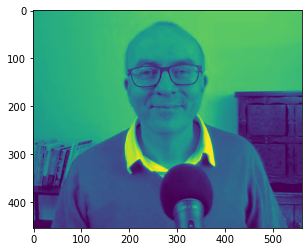

In [7]:

r,g,b=cv2.split(img2)
plt.imshow(r)
l=255
s=l-r
b[:]=[x for x in b]
g[:]=[x for x in g]
r[:]=[x for x in r]
myimages=cv2.merge((b,g,r))
# plt.imshow(myimages)

## G. plot histogram equalization
### Note: Be sure to turn in: A listing of your code and printouts of the original images, image J, and image K

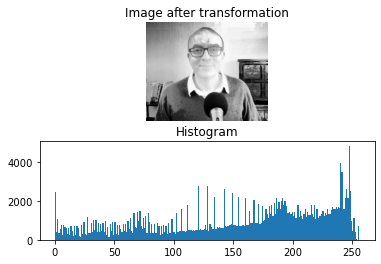

Text(0.5, 1.0, 'Histogram')

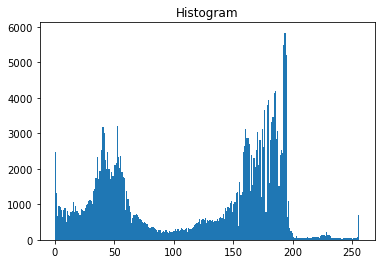

In [8]:
import numpy as np
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
newImg = np.zeros((gray.shape[0], gray.shape[1]))
winSize = 256
for row in range(gray.shape[0]-winSize+1):
    for col in range(gray.shape[1]-winSize+1):
        newImg[row:row+winSize,col:col+winSize] = cv2.equalizeHist(gray[row:row+winSize,col:col+winSize])



plt.subplot(211)
plt.axis('off')
plt.title("Image after transformation")
plt.imshow(newImg, cmap="gray")

#writing output image
cv2.imwrite("SlidingWindow.jpg", newImg)

plt.subplot(212)
plt.hist(newImg.ravel(),256,[0,256])
plt.title("Histogram")

plt.show()

plt.hist(gray.ravel(),256,[0,256])
plt.title("Histogram")